# Calculadora de Opções

Para usar a calculadora, é só clicar me "run all" e ir preenchendo as caixas de texto que aparecerem

A calculadora possui os mecanismos descritos na célula de funções, sendo os principais os seguintes recursos:
- Simulação de Monte Carlo (mc_normal) para simular a série de preço de um ativo.
- Precificação de Opção Europeia (euro_vanilla_call) para precificar uma Call.
- Precificação de Opção Europeia (euro_vanilla_put) para precificar uma Put.
- Precificação de Call ou Put de uma Opção Exótica (exotica) em que o preço de exercício é calculado pela média dos preços dos últimos 5 dias.
- Precificação de Opção Binária (binaria)

Obs: A calculadora importa os dados através da API do Yahoo Finance e do Banco Central através de algumas funções. A conexão com a internet é necessária.

### Importar Libs

In [1]:
import yfinance as yf
import math
import matplotlib.pyplot as plt
import numpy as np
import opcoes as op
from time import time
import pandas as pd
from datetime import date
import scipy.stats
plt.style.use('dark_background')
%matplotlib inline
%load_ext autoreload
%autoreload 2

### Funções

In [2]:
df = str(input("Qual ativo analisar? Ex. digite ITSA4.SA  "))
date = str(input("Qual a data mais antiga? formato aaaa-mm-dd (ex: 2015-01-01)  "))

data = yf.download(df, start=date)
display(data)

Qual ativo analisar? Ex. digite ITSA4.SA  ITSA4.SA
Qual a data mais antiga? formato aaaa-mm-dd (ex: 2015-01-01)  2015-01-01
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,6.969978,7.036998,6.791261,6.828494,4.695516,14567668
2015-01-05,6.724242,6.955085,6.687009,6.850834,4.710878,27743553
2015-01-06,6.865727,6.925299,6.768921,6.902959,4.746720,45486782
2015-01-07,7.036998,7.267841,7.022104,7.163589,4.925938,26784452
2015-01-08,7.223161,7.282734,7.051891,7.238055,4.977144,21225106
...,...,...,...,...,...,...
2021-05-21,10.790000,10.850000,10.650000,10.840000,10.821634,18604600
2021-05-24,10.860000,10.900000,10.760000,10.860000,10.841600,26485900
2021-05-25,10.850000,10.880000,10.730000,10.780000,10.780000,29283000


<AxesSubplot:title={'center':'Série Temporal Cotações'}, xlabel='Date'>

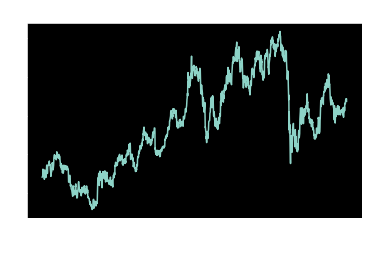

In [3]:
data["Close"].plot(title= 'Série Temporal Cotações')

In [4]:
#DataFrame com os Retornos
x = op.calcula_retornos(data)
x

,Close
Date,
2015-01-05,0.003272
2015-01-06,0.007609
2015-01-07,0.037756
2015-01-08,0.010395
2015-01-09,-0.034979
...,...
2021-05-21,0.005566
2021-05-24,0.001845
2021-05-25,-0.007366


<AxesSubplot:title={'center':'Série Temporal dos Retornos'}, xlabel='Date'>

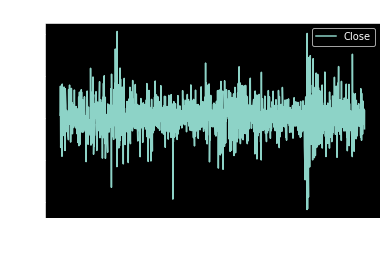

In [5]:
x.plot(title = "Série Temporal dos Retornos")

array([[<AxesSubplot:title={'center':'Close'}>]], dtype=object)

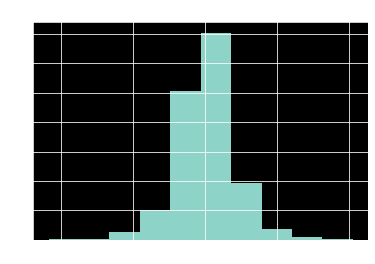

In [6]:
#Histograma dos Retornos
x.hist()

In [7]:
x.describe()

,Close
count,1585.000000
mean,0.000493
std,0.020348
min,-0.108654
25%,-0.010949
50%,0.000000
75%,0.011823
max,0.102696


### Simula Preço de Ativos (preencher caixa de texto)

Qual o preço da ação? 10
Qual o preço de exercício? 12
Para quantos períodos de tempo? 100
Quantas simulações? 1000
DataFrame = 1, call = 2 ou put = 3? 1


,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,9.993080,10.208946,9.905537,9.962744,10.046662,9.991278,9.806762,10.148826,9.928895,10.119400,...,9.890368,9.834368,9.873973,10.076426,10.097421,9.738324,9.854822,9.480856,9.630109,10.220380
1,9.765733,9.983151,10.183986,9.895405,9.847102,9.934186,10.356742,10.133344,10.151864,10.159077,...,10.036847,9.681729,9.784868,10.370892,10.135008,9.627528,9.886952,9.560381,9.739833,10.173057
2,9.978320,10.132230,10.443476,9.755805,9.976715,9.748609,10.378281,10.185735,9.973141,10.405648,...,9.735142,9.718111,9.970321,10.310256,10.227145,9.605089,9.815647,9.589137,9.714923,10.013865
3,9.957482,10.198017,10.325148,9.790900,9.883889,9.323493,10.439556,10.126085,10.070149,10.550571,...,9.788728,9.484244,9.963094,10.576111,9.979568,9.559571,9.672300,9.421639,10.055874,10.079800
4,10.091205,10.255978,10.624639,9.758167,9.768367,9.370364,10.392426,10.437544,10.380670,10.395285,...,9.904484,9.088634,9.820854,10.499008,9.946667,9.733291,9.866289,9.243491,10.190649,10.191239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,13.572986,11.066706,9.812287,11.262845,11.917740,12.102108,9.638503,10.925793,7.412192,9.657933,...,10.115449,7.163885,11.333638,9.698575,13.667075,10.251734,9.724037,6.763622,7.495145,10.704287
97,13.021182,10.983080,9.871383,11.212616,11.904104,11.923597,9.736585,10.657481,7.515918,9.743986,...,10.196864,7.340559,11.545747,9.820833,12.800382,10.096546,9.767412,6.931431,7.551708,10.881511
98,12.940984,10.727315,10.156374,10.937025,12.409884,11.624746,9.542242,10.692766,7.472218,10.027736,...,9.953228,7.322343,12.003098,10.054136,13.058124,9.991473,9.719032,6.953920,7.620692,11.040233
99,12.916659,10.136426,9.825048,11.036073,12.146062,11.843814,8.971345,10.782818,7.422193,9.884284,...,9.751070,7.369149,11.638885,10.538411,13.536242,9.868484,9.193630,6.948058,7.458769,10.554774


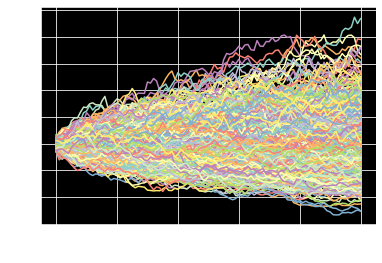

In [8]:
S = op.mc_normal(x)
display(S)
plt.plot(S)
plt.grid(True)
plt.xlabel('Steps')
plt.ylabel('Valor $')
plt.show()

### Precifica Call Europeia por MC (preencher caixa de texto)

In [9]:
op.mc_normal(x)

Qual o preço da ação? 10
Qual o preço de exercício? 12
Para quantos períodos de tempo? 100
Quantas simulações? 1000
DataFrame = 1, call = 2 ou put = 3? 2


0.26264781165646783

### Precifica Put Europeia por MC (preencher caixa de texto)

In [10]:
op.mc_normal(x)

Qual o preço da ação? 10
Qual o preço de exercício? 10
Para quantos períodos de tempo? 100
Quantas simulações? 1000
DataFrame = 1, call = 2 ou put = 3? 3


0.7955360929494675

### Precifica Call Europeia por BS (preencher caixa de texto)

In [11]:
o = op.euro_vanilla_call(x)
o

Qual o preço da ação? 10
Qual o preço de exercício? 12
Quantos períodos até a data de expiração? 100


0.27

### Precifica Put Europeia por BS (preencher caixa de texto)

In [12]:
o = op.euro_vanilla_put(x)
o

Qual o preço da ação? 10
Qual o preço de exercício? 10
Quantos períodos até a data de expiração? 100


0.75

### Precifica Call Exótica por MC - Preço final igual a média dos últimos 5 dias (preencher caixa de texto)

In [13]:
op.exotica(x, retornar = 2)

Qual o preço da ação? 10
Qual o preço de exercício? 12
Para quantos períodos de tempo? 100
Quantas simulações? 10000


0.2364982104628767

### Precifica Put Exótica por MC - Preço final igual a média dos últimos 5 dias (preencher caixa de texto)

In [14]:
op.exotica(x, retornar = 3)

Qual o preço da ação? 10
Qual o preço de exercício? 10
Para quantos períodos de tempo? 100
Quantas simulações? 10000


0.7484921436648864

### Precifica Higher Binária por MC (preencher caixa de texto)


In [18]:
op.binaria(x, retornar = 1)

Qual o preço da ação? 10
Qual o preço de exercício? 12
Qual o valor da recompensa? 1000
Para quantos períodos de tempo? 100
Quantas simulações? 10000


174.4696900308832

### Precifica Lower Binária por MC (preencher caixa de texto)

In [19]:
op.binaria(x, retornar = 2)

Qual o preço da ação? 10
Qual o preço de exercício? 12
Qual o valor da recompensa? 1000
Para quantos períodos de tempo? 100
Quantas simulações? 10000


813.8300529890802